In [1]:
import os, sys, warnings

# setting project path
gparent = os.path.join(os.pardir)
sys.path.append(gparent)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The Monty Hall Problem
## Frequentist Simulations & Bayesian Calculations

Author: Jeffrey Hanif Watson

![graph0](../figures/odds.png)

Win probabilites for the two strategies of the Monty Hall game. Read on to find the optimal strategy.

## Introduction
Recently, I was asked to code a simulation of the Monty Hall game during a lesson on Bayesian statistics. I found it amusing that I was required to use a frequentist approach to probability for insight into what was explained as a Bayesian problem. I decided to Investigate further and come up with my own Bayesian understanding of what was going on.
For those unfamiliar with this famous mental puzzle, allow me to lay out the rules and key assumptions of the game. The Monty Hall problem is named after the host of the Let’s Make A Deal game show and follows similar rules to that game. A contestant is presented with identical three doors, two of which contain goats, and one of which contains a car. The contestant is then asked to announce which door they chose, and one of the other doors is opened. Its contents are revealed to the player, and the host then asks the player if they would like to switch their choice of doors before the car is revealed. Whichever choice the player makes at this point, they win if the car is behind the door they chose. You should take a moment to think about what you would do in this situation, and take note of it. You may be surprised, or have some of your assumptions challenged, by the end of the article.

## Random Choices
According to wikipedia, although the Monty Hall problem was originally proposed in 1975, it gained notoriety in 1990 after being posed as a question to a columnist in Parade magazine. The columnist’s correct solution sparked a harsh (and largely incorrect) backlash. Before diving into the simulation code and mathematical solution, let’s lay out some key assumptions of the game:
- The car is placed at random.
- The player chooses their door at random.
- The host always opens a door (which contains a goat) that the player didn’t choose. Also, The host makes this choice at random if the player chose the door containing the car at the beginning of the game.
- The player is always given the choice to change doors after the door containing the goat is opened.
These assumptions of random choice are used liberally in the simulation code, and also undergird the mathematical calculation later in the article. If these assumptions are changed, either the calculation would take on a different form, or the underlying probabilities would change. The Monty Hall problem wikipedia article discusses these scenarios in depth for those who wish to explore them more closely.

## Simulating Monty Hall: A Frequentist Approach
The frequentist definition of the probability of an event is the limit of the relative frequency of that event over many trials. We will use this definition to simulate the probability of winning the Monty Hall game using python. This article assumes some basic knowledge of python coding, but aims to walk beginners through the steps of making the simulator.
## Code and Explanations
The code was written for use in a juypter notebook and begins by importing the necessary libraries and setting matplotlibto inline plotting:

```
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
```

Initializing the empty lists used in our for loop:
```
    keep_count = [] # count of simulated wins if door is kept
    change_count = [] # count of simulated wins if door is changed
    P_keep = [] # proportion of keep wins after each game 
    P_change = [] # proportion of a change wins after each game
```
The main for loop (this will be explained piece by piece below):
```
    for i in range(number_of_games):
        doors = [1, 2, 3] # door labels
        # set the car door
        car_door = np.random.choice(range(1,4))
        # set the player door
        player_door = np.random.choice(range(1,4)) 
        # set the goats' doors given car door and player door
        goat_doors = [door for door in doors if\
                      door != car_door and door != player_door]
        # set the door Monty reveals given the goat doors
        revealed_door = np.random.choice(goat_doors)
        # set the change door given player door and revealed door
        changed_door = [door for door in doors if\
                        door != player_door and door\
                        != revealed_door]
        
        if player_door == car_door:  #  add one to keep wins
            keep_count.append(1)
        else:                        # keep one to losses
            keep_count.append(0)
        if changed_door == car_door: # add one to change wins
            change_count.append(1)
        else:                        # add one to change losses
            change_count.append(0)
        # proportion of keep wins in i games
        P_k_i = np.mean(keep_count[:i]) 
        P_keep.append(P_k_i)
        # proportion of change wins i games
        P_c_i = np.mean(change_count[:i]) 
        P_change.append(P_c_i)
```
There is a bit going on in the loop, so we’ll break it down piece by piece for clarity. number_of_games will be an integer setting the number of simulations we want to run. For each game simulation, we start by randomly setting the car door value to 1, 2 or 3, using numpy’s random.choice().
```
    for i in range(number_of_games):
        doors = [1, 2, 3] # door labels
        # set the car door
        car_door = np.random.choice(range(1,4))
```
Next, we set the player door value by the same method.
```
    # set the player door
    player_door = np.random.choice(range(1,4))
```
We now set the two goat door values using a list comprehension with the values from the two previous steps. We are forming a list of two values that are neither the car door value nor the player door value.
```
    # set the goat doors given car door and player door
    goat_doors = [door for door in doors if\
                  door != car_door and door != player_door]
```
Now, we set the revealed door value by choosing randomly from the two goat door values.
```
    # set the door Monty reveals given the goat doors
    revealed_door = np.random.choice(goat_doors)
```
Next, we set the change door value according to the player door value and the revealed door value.
```
    # set the change door given player door and revealed door
    changed_door = [door for door in doors if\
                    door != player_door and door\
                    != revealed_door]
```
Our next step is to count the number of wins and loses based on the values that were chosen above. We are just checking if either the player door value matches the car door value, or the change door value matches the car door value. From the code in the cell above we see that these are mutually exclusive numbers, so one of them has to match the car door value and win, while the other number loses.
```
    if player_door == car_door:  #  add one to keep wins
        keep_count.append(1)
    else:                        # add one to keep losses
        keep_count.append(0)
    if changed_door == car_door: # add one to change wins
        change_count.append(1)
    else:                        # add one to change losses
        change_count.append(0)
```
Lastly, we calculate the relative frequencies of the wins, for both keep and change, at each iteration of the game we play. Recall that the frequentist definition of probability is the limit of the relative frequencies of an event over many trials.
```
    # proportion of keep wins in i games
    P_k_i = np.mean(keep_count[:i]) 
    P_keep.append(P_k_i)
    # proportion of change wins i games
    P_c_i = np.mean(change_count[:i]) 
    P_change.append(P_c_i)
```
## Results
Running the code for 5000 games reveals the following:

![graph1](../figures/odds.png)

Change door for the win!!!
```
    Simulated Probabilities:
    Probability of Winning if Door is Kept:        0.33
    Probability of Winning if Door is Changed:     0.67
```
We can see from the visualization that the relative frequencies level out to a limiting value fairly quickly (at around 1000 games) and remain steady. These are the probabilities for the keep and change strategies. 

In the introduction of the article, when I asked what would your choice be in the Monty Hall game, what did you choose? Did the results surprise you? If they did, you are in esteemed company. During the 1990 controversy, many PhD level mathematicians and statisticians incorrectly calculated the probability of winning to be .5 for both keep and change. What is going on behind the scenes in this seemingly straightforward game that confounds amateur and expert alike? It’s going to take a Bayesian Approach to probability to untangle this mystery.

## Calculating Monty Hall: A Bayesian Approach
The informal understanding of Bayesian probability is that the probability of an event is not some fixed, objective quantity. For Bayes, if you start with a prior assumption about the probability of an event, and subsequently receive new information that is pertinent to that event, you should update your understanding about the probability of the event. This notion is formalised in Bayes’ Theorem:
P(A|B) = P(B|A)P(A)/P(B)

Given a prior probability of an event A [P(A)], the posterior probability (updated by new information B) [ P(A|B)] is the prior probability [P(A) ] multiplied by the likelihood of the new information B, given that event A occurs [P(B|A)/P(B)].

Intuitively this approach makes sense, and we perform this type of reasoning every day while navigating our way through life, literally. While walking down a crowded street or driving a car, we are subconsciously assessing and re-assessing the likelihood of events based on a stream of constantly updating information. We are going to take this powerful technique of reasoning and apply it to the Monty Hall problem to see if we can get some clarity into what is going on.

## Calculating the Monty Hall Problem Probabilities
Given the conditions of The Monty Hall Problem:

Let our events be as follows:

A = The event that the car is behind the door chosen by the player.

B = The event that a goat is revealed behind a door not chosen by the player.

Then,

P(A) = 1/3, since there are three doors and one door contains the car.

P(A’) = 2/3, since P(A) + P(A’) = 1 by the definition of the complement of an event.

P(B|A) = P(B|A’) = 1, since a goat behind a door the player hasn’t chosen is always revealed.

Thus formally,

P(B) = P(B|A)P(A) + P(B|A’)P(A’) = 1(1/3) + 1(2/3) = 1

So,

P(A|B) = P(B|A)P(A)/P(B) = 1(1/3)/1 = 1/3 by Bayes’ Theorem.

Since,

P(A|B) + P(A’|B) = 1 by the definition of the complement of an event,

we have P(A’|B) = 1 — P(A|B) = 1 — (1/3) = 2/3.

## Results
We have just shown that the probability of the car not being behind the player’s original door is 2/3, so the optimal strategy in the Monty Hall game is to always change doors. This finding is in line with the simulations we ran above. It seems counter-intuitive that with two doors left in the game the probability for either would be anything other than 50–50, but we must take into account the information we gained when the host opened the door and revealed the goat.
Since P(A|B) = P(A), we see that event B happening did nothing to update the probability of event A. P(A) remains 1/3, and the probability of A’ remains unchanged at 2/3 as well. However, the event A’ has been reduced to the car being behind the remaining door that the player didn’t pick at the start of the game. Thus, the probability that the alternate door contains the car has doubled from 1/3, at the start of the game, to 2/3 because of the new information provided by event B.
## Conclusion
Hopefully this post has helped you gain some insight into the Monty Hall Problem and some of math underlying it. I have wrapped the simulation code in a function to make it easy to run multiple tests very quickly. Be forewarned though, for very large numbers of games the function can take a fair bit of time to return a result.

## Simulation Function

In [2]:
def monty_hall(n : int):
    """
    Input: An integer n specifying the number of games to be simulated.
    
    Return: The simulated probabilities of winning for each strategy
            after n games, and a graph of the simulated probabilities 
            of winning for each strategy over n games.
    """
    keep_count = [] # count of simutated wins if door is kept
    change_count = [] # count of simulated wins if door is changed
    P_keep = [] # proportion of keep wins after each game 
    P_change = [] # proportion of a change wins after each game
    
    for i in range(n):
        doors = [1, 2, 3] # door labels
        car_door = np.random.choice(range(1,4)) # set car door
        player_door = np.random.choice(range(1,4)) # set player door
        # set goats doors given car door and player door
        goat_doors = [door for door in doors if\
                      door != car_door and door != player_door]
        # set the door Monty reveals given the goat doors
        revealed_door = np.random.choice(goat_doors)
        # set the change door given the player door and the revealed door
        changed_door = [door for door in doors if\
                        door != player_door and door != revealed_door]
        
        if player_door == car_door:  # keep wins
            keep_count.append(1)
        else:                        # keep losses
            keep_count.append(0)
        if changed_door == car_door: # change wins
            change_count.append(1)
        else:                        # change losses
            change_count.append(0)
        
        P_k_i = np.mean(keep_count[:i]) # proportion of keep wins in i games
        P_keep.append(P_k_i)
        P_c_i = np.mean(change_count[:i]) # proportion of change wins i games
        P_change.append(P_c_i)
    
    # graphing the results
    fig, ax = plt.subplots(figsize=(10,5))
    plt.plot(range(n), P_keep, label='Keep Door')
    plt.plot(range(n), P_change, label='Change Door')
    plt.ylabel('Probability of Winning', size=15)
    plt.xlabel('Number of Simulations', size=15)
    plt.title('Simulated Probabilities of Winning the Monty Hall Game', size=15)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.legend(prop={'size': 12})
    path = os.path.join(gparent,'figures', 'odds.png')
    plt.savefig(path,  bbox_inches ="tight",\
                    pad_inches = .25, transparent = False)
    plt.show()
    
    # printing results
    print('Simulated Probabilities:')
    print(f'Probability of Winning if Door is Kept:\t \t\
          {round(np.mean(keep_count), 2)}')
    print(f'Probability of Winning if Door is Changed:\t\
          {round(np.mean(change_count), 2)}')      

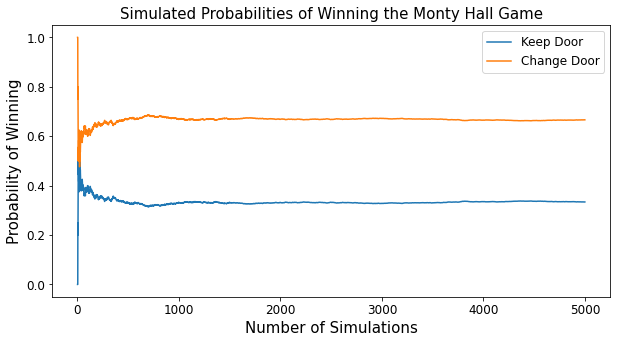

Simulated Probabilities:
Probability of Winning if Door is Kept:	 	          0.33
Probability of Winning if Door is Changed:	          0.67


In [3]:
# Suppressing Mean of empty slice RuntimeWarnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    monty_hall(5000)